<a href="https://colab.research.google.com/github/juanalverto/CNN_MNIST_DB/blob/main/Red_Neuronal_Densamente_Conectada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Visualizar dígitos MNIST**

In [ ]:
data_file = open('/content/drive/My Drive/MNIST_Classification/mnist_train_100.csv', 'r') #Abrimos el archivo en cuestión
data_list = data_file.readlines() #Almacenamos en una lista la información de cada imagen
data_file.close() #Cerramos el manejador de archivos que se utilizó previamente

In [ ]:
len(data_list)

100

In [ ]:
data_list[96]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,67,141,205,255,255,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,57,121,188,253,253,254,253,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,198,241,253,254,253,253,215,179,253,253,165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,253,253,253,191,116,28,16,79,253,253,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,114,114,13,0,0,0,0,142,254,207,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,217,253,143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,254,234,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,254,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,242,252,75,0,0,0,0,0

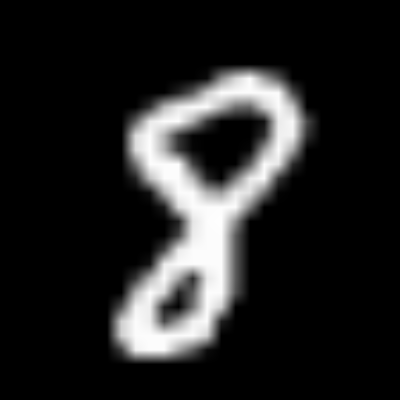

In [ ]:
import numpy as np
import matplotlib.pyplot
from google.colab.patches import cv2_imshow
import cv2 #openCV
%matplotlib inline

all_values = data_list[94].split(',') #Accedemos al dato 67 de la base de datos MNIST
image_array = np.asfarray(all_values[1:]).reshape((28,28)) #La lista se convierte en un arreglo de 28 X 28 y los píxeles se convierten en floats
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') #Mostramos la imagen correspondiente
image_array = cv2.resize(image_array, (400,400))
cv2_imshow(image_array)

# **Implementación de red neuronal densamente conectada**

In [ ]:
#scipy.special importa la función sigmoide expit()
import scipy.special

In [ ]:
# definición de la clase neural network 
class neuralNetwork:
    
    # inicialización 
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # establecer número de neuronas en la capa de entrada, capa oculta y capa de salida
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Matrices de los pesos y bias asociados a los enlaces
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5 # filas simpre primer paramtero y columnas el segundo (de la matriz)
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        #self.bih = np.random.rand(self.hnodes, 1) - 0.5
        #self.bho = np.random.rand(self.onodes, 1) - 0.5
        self.wih = np.random.normal(0.0, pow(self.inodes + 1, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes + 1, -0.5), (self.onodes, self.hnodes))
        self.bih = np.random.normal(0.0, pow(self.inodes + 1, -0.5), (self.hnodes, 1))
        self.bho = np.random.normal(0.0, pow(self.hnodes + 1, -0.5), (self.onodes, 1))

        # tasa de aprendizaje
        self.lr = learningrate
        
        # la función de activación es la función sigmoide
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # entrenamiento
    def train(self, inputs_list, targets_list):
        
        # convertir las entradas en un arreglo 2d
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calcular las señales que entran a la capa oculta
        hidden_inputs = np.dot(self.wih, inputs) + self.bih
        #calcular las señales que emergen de la capa oculta
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calcular las señales que entran a la capa de salida
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        # calcular las señales que emergen de la capa de salida
        final_outputs = self.activation_function(final_inputs)
        
        # el error de la capa de salida es (target - actual)
        output_errors = targets - final_outputs
        # el error de la capa oculta está dado por los output_errors, divididos en los pesos y recombinados en las neuronas de la capa oculta
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # actualizar los pesos y bias para los enlaces entre la capa oculta y la capa de salida
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.bho += self.lr * (output_errors * final_outputs * (1.0 - final_outputs))
        
        # actualizar los pesos y bias para los enlaces entre la capa de entrada y la capa de salida
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        self.bih += self.lr * (hidden_errors * hidden_outputs * (1.0 - hidden_outputs))

        pass

    
    # probar la neural network
    def query(self, inputs_list):
        # convertir la lista de entrada en un arreglo 2d
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calcular las señales que llegan a la capa oculta
        hidden_inputs = np.dot(self.wih, inputs) + self.bih
        # calcular las señales que emergen de la capa oculta
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calcular las señales que llegan a la capa de salida
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        # calcular las señales que emergen de la capa de salida
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [ ]:
# número de neuronas en la capa de entrada, en la capa oculta y en la capa de salida
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.1

# instanciamos un objeto de la clase neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [ ]:
# cargar los datos de entrenamiento en una lista
training_data_file = open('/content/drive/My Drive/MNIST_Classification/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [ ]:
# entrenamiento de la red neuronal

# epochs es el número de veces que el conjunto de entrenamiento es usado durante la fase de entrenamiento
epochs = 5

for e in range(epochs):
    # iteramos en todos los registros del conjunto de entrenamiento
    for record in training_data_list:
        # usamos la coma ',' para separar los elementos de cada registro 
        all_values = record.split(',')
        # normalizamos las entradas
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # creamos un arreglo con los valores de salida (todos van a valer 0.01, excepto el valor deseado, que tendrá un valor de 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_vaues[0] es la etiqueta del registro actual
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [ ]:
# cargar los datos de prueba en una lista
test_data_file = open('/content/drive/My Drive/MNIST_Classification/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
# evaluar el desempeño de la red neuronal

# la lista scorecard (inicialmente vacía) nos servirá para conocer el desempeño de la red neuronal
scorecard = []

# iteramos en todos los registros del conjunto de orueba
for record in test_data_list:
    # usamos la coma ',' para separar los elementos de cada registro 
    all_values = record.split(',')
    # la respuesta correcta es el primer valor
    correct_label = int(all_values[0])
    # normalizamos las entradas
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # probamos la red neuronal
    outputs = n.query(inputs)
    # el índice con el valor más alto corresponde al valor obtenido
    label = np.argmax(outputs)
    # agregamos el valor obtenido a la lista scorecard
    if (label == correct_label):
        # si la salida de la red neuronal es igual a la respuesta correcta, agregamos 1 a scorecard
        scorecard.append(1)
    else:
        # si la salida de la red neuronal es diferente a la respuesta correcta, agregamos 1 a scorecard
        scorecard.append(0)
        pass
    
    pass

In [ ]:
# calculamos la precisión en el reconocimiento, que es igual a la proporción de las respuestas correctas con respecto al número total de respuestas
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9649


La implementación previa se tomó del libro "Make your own neural network", de Tariq Rashid. Asimismo, es importante aclarar que la implementación aquí presentada, contiene ligeras variaciones con respecto al código de la fuente previamente citada.